In [75]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [76]:
iris = load_iris()
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length','sepal_width',
                                                  'petal_length','petal_width'])
irisDF.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [78]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)
irisDF['cluster'] = kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [79]:
irisDF['target'] = iris.target
irisDF.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)
irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]

irisDF

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


In [26]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

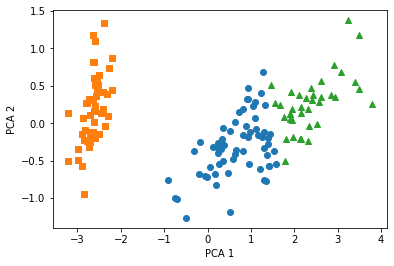

In [28]:
plt.scatter(x = irisDF.loc[marker0_ind,'pca_x'],
           y = irisDF.loc[marker0_ind,'pca_y'], marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind,'pca_x'],
           y = irisDF.loc[marker1_ind,'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind,'pca_x'],
           y = irisDF.loc[marker2_ind,'pca_y'], marker = '^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

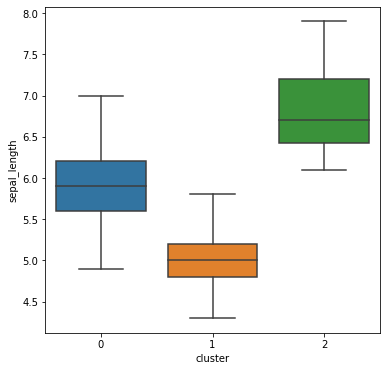

In [29]:
import seaborn as sns

plt.figure(figsize = (6,6))
g = sns.boxplot(data = irisDF,y = 'sepal_length', x = 'cluster')

### k-평균 군집화 lab

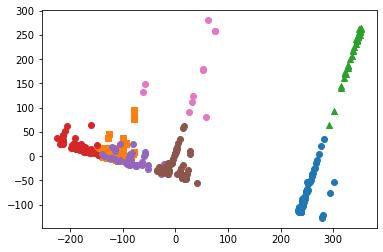

In [81]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

boston = load_boston()
bostonDF = pd.DataFrame(data = boston.data, columns = boston.feature_names)

# scaler = MinMaxScaler()
# bostonDF[boston.feature_names.tolist()] = scaler.fit_transform(bostonDF[boston.feature_names.tolist()])

kmeans = KMeans(n_clusters = 7)
kmeans.fit(bostonDF)
bostonDF['cluster'] = kmeans.labels_
pca = PCA(n_components = 2)
clusterDF = pca.fit_transform(bostonDF)
bostonDF['ftr1'] = clusterDF[:,0]
bostonDF['ftr2'] = clusterDF[:,1]
marker0_ind = bostonDF.loc[bostonDF['cluster'] == 0].index
marker1_ind = bostonDF.loc[bostonDF['cluster'] == 1].index
marker2_ind = bostonDF.loc[bostonDF['cluster'] == 2].index
marker3_ind = bostonDF.loc[bostonDF['cluster'] == 3].index
marker4_ind = bostonDF.loc[bostonDF['cluster'] == 4].index
marker5_ind = bostonDF.loc[bostonDF['cluster'] == 5].index
marker6_ind = bostonDF.loc[bostonDF['cluster'] == 6].index


plt.scatter(x = bostonDF.loc[marker0_ind, 'ftr1'],
           y = bostonDF.loc[marker0_ind, 'ftr2'], marker = 'o')
plt.scatter(x = bostonDF.loc[marker1_ind, 'ftr1'],
           y = bostonDF.loc[marker1_ind, 'ftr2'], marker = 's')
plt.scatter(x = bostonDF.loc[marker2_ind, 'ftr1'],
           y = bostonDF.loc[marker2_ind, 'ftr2'], marker = '^')
plt.scatter(x = bostonDF.loc[marker3_ind, 'ftr1'],
           y = bostonDF.loc[marker3_ind, 'ftr2'], marker = 'o')
plt.scatter(x = bostonDF.loc[marker4_ind, 'ftr1'],
           y = bostonDF.loc[marker4_ind, 'ftr2'], marker = 'o')
plt.scatter(x = bostonDF.loc[marker5_ind, 'ftr1'],
           y = bostonDF.loc[marker5_ind, 'ftr2'], marker = 'o')
plt.scatter(x = bostonDF.loc[marker6_ind, 'ftr1'],
           y = bostonDF.loc[marker6_ind, 'ftr2'], marker = 'o')

# ftr1 = bostonDF[:,0]
# ftr2 = bostonDF[:,1]

# plt.scatter(x = ftr1, y = ftr2)
# kmeans = KMeans(n_clusters = 7)
# boston_pca = pca.fit_transform(bostonDF)
# ftr1 = boston_pca[:,0]
# ftr2 = boston_pca[:,1]
# kmeans
# plt.scatter()
# kmeans.fit(boston_pca)
# pca = PCA(n_components = 2)
# boston_pca = pca.fit_transform(boston.data)
# pca_df = pd.DataFrame(data = boston_pca, columns = ['ftr1','ftr2'])
# pca_df

### 군집생성

In [87]:
import numpy as np
import matplotlib.pyplot as lpt
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 200, n_features = 2,
                centers = 3, cluster_std = 0.8, random_state = 0)


array([[-1.69242695,  3.62202539],
       [ 0.69794036,  4.4288665 ],
       [ 1.10022802,  4.60631734],
       [-1.44872404,  3.38424521],
       [ 1.21486062,  5.36489604],
       [-0.90830163,  1.97077775],
       [ 2.47211942,  0.43703328],
       [ 1.65684156,  2.4412893 ],
       [ 1.07779975,  4.62537882],
       [-1.67942681,  2.60200265],
       [ 0.65372852,  5.28174338],
       [-0.97188549,  2.79022351],
       [ 1.58510026,  4.40112734],
       [ 1.29307545,  3.42933812],
       [ 0.25043139,  4.34534364],
       [-1.07307179,  2.73974218],
       [ 2.68432989,  0.52452838],
       [ 2.16883005,  0.64220093],
       [ 0.32575305,  2.92276125],
       [-3.15145159,  4.56947655],
       [-1.06408682,  3.19760583],
       [ 1.45946366,  0.23651283],
       [ 1.01287689,  4.15404025],
       [ 1.73407165,  4.17977925],
       [-3.3313554 ,  2.09987679],
       [-0.3148482 ,  4.1335951 ],
       [ 1.5403728 , -0.88105886],
       [-2.13821915,  1.76764908],
       [-0.84056487,

In [91]:
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

In [94]:
clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y

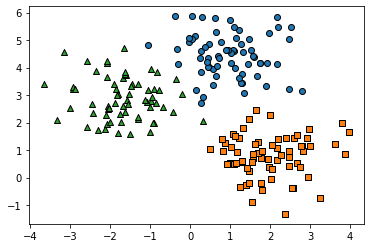

In [97]:
target_list = np.unique(y)
markers = ['o','s','^','P','D','H','x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'],y = target_cluster['ftr2'],
               edgecolor = 'k', marker = markers[target])
    

In [100]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 200, random_state = 0)
clusterDF['cluster'] = kmeans.fit_predict(X)
clusterDF

,ftr1,ftr2,target,cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


In [104]:
cluster_labels = kmeans.fit_predict(X)

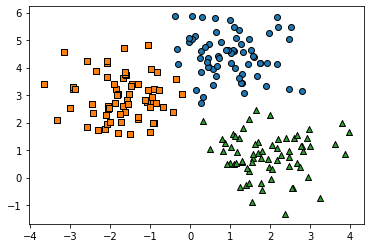

In [107]:
centers = kmeans.cluster_centers_
unique_label = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']
for label in unique_label:
    label_cluster = clusterDF[clusterDF['cluster']==label]
    plt.scatter(data = label_cluster, x = 'ftr1', y = 'ftr2',
               edgecolor = 'k',marker = markers[label])
    plt.scatter(x = center_x_y)
    

### 군집생성 lab

In [109]:
from sklearn.datasets import make_blobs

std_list = [0.4,0.8,1.2,1.6]

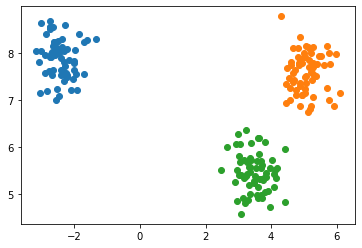

In [113]:
X,y = make_blobs(n_samples = 200, n_features = 2,cluster_std = 0.4, centers = 3,
                )
clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
    
target_list = np.unique(y)
for target in target_list:
    result_df = clusterDF[clusterDF['target'] == target]
    plt.scatter(data = result_df, x = 'ftr1',y = 'ftr2')

    
    


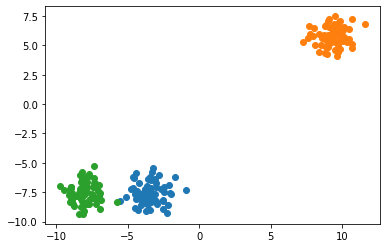

In [116]:
X,y = make_blobs(n_samples = 200, n_features = 2,cluster_std = 0.8, centers = 3,
                )
clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
    
target_list = np.unique(y)
for target in target_list:
    result_df = clusterDF[clusterDF['target'] == target]
    plt.scatter(data = result_df, x = 'ftr1',y = 'ftr2')

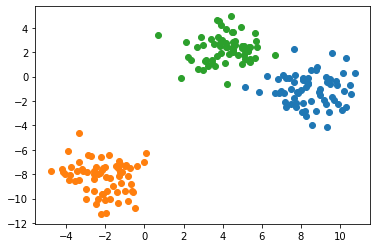

In [115]:
X,y = make_blobs(n_samples = 200, n_features = 2,cluster_std = 1.2, centers = 3,
                )
clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
    
target_list = np.unique(y)
for target in target_list:
    result_df = clusterDF[clusterDF['target'] == target]
    plt.scatter(data = result_df, x = 'ftr1',y = 'ftr2')

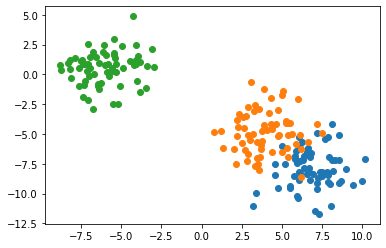

In [114]:
X,y = make_blobs(n_samples = 200, n_features = 2,cluster_std = 1.6, centers = 3,
        )
clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
    
target_list = np.unique(y)
for target in target_list:
    result_df = clusterDF[clusterDF['target'] == target]
    plt.scatter(data = result_df, x = 'ftr1',y = 'ftr2')

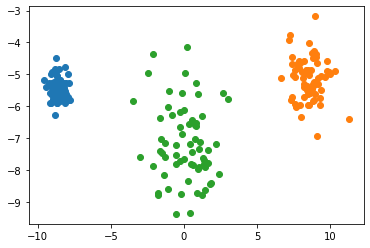

In [117]:
X,y = make_blobs(n_samples = 200, n_features = 2,cluster_std = [0.4,0.8,1.6], centers = 3,
        )
clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
    
target_list = np.unique(y)
for target in target_list:
    result_df = clusterDF[clusterDF['target'] == target]
    plt.scatter(data = result_df, x = 'ftr1',y = 'ftr2')

### 실루엣 점수

In [120]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300)
kmeans.fit(irisDF)

KMeans(n_clusters=3)

In [121]:
irisDF['cluster'] = kmeans.labels_

In [124]:
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print(score_samples.shape)

irisDF['silhouette_coeff'] = score_samples

(150,)


In [125]:
average_score = silhouette_score(iris.data, irisDF['cluster'])
print(average_score)

0.5528190123564091


In [126]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [130]:
irisDF.groupby(['cluster'])[['silhouette_coeff']].mean()

,silhouette_coeff
cluster,
0,0.451105
1,0.798140
2,0.417320


In [131]:
def no_clusters_silhouette(cluster_list, X_features):
    for n_cluster in cluster_list:
        clusters = KMeans(n_clusters = n_cluster, max_iter = 50, random_state = 0)
        cluster_labels = clusters.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        print('Number of Cluster :' + str(n_cluster) + ' Silhouette score' + str(round(sil_avg,3)))

In [132]:
no_clusters_silhouette([2,3,4,5],iris.data)

Number of Cluster :2 Silhouette score0.681
Number of Cluster :3 Silhouette score0.553
Number of Cluster :4 Silhouette score0.498
Number of Cluster :5 Silhouette score0.493


In [136]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 500, n_features = 2,
                centers = 4, shuffle=True)

clusterDF = pd.DataFrame(X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y


,ftr1,ftr2,target
0,-6.951971,-9.227935,0
1,-7.144352,-0.617797,2
2,-6.126415,-2.578251,3
3,3.288262,-2.003322,1
4,2.739311,-3.082296,1
...,...,...,...
495,-4.349469,0.205873,3
496,2.452297,-1.256660,1
497,-6.213156,-9.343345,0
498,-6.107756,-8.714096,0


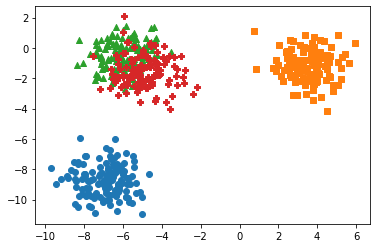

In [146]:
target_list = np.unique(y)
markers = ['o','s','^','P','D','H','x']

for target in target_list:
    df = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = df['ftr1'],y = df['ftr2'], marker = markers[target])

In [147]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(clusterDF[['ftr1','ftr2']],clusterDF['target'])

In [148]:
clusterDF['silhouette_score'] = sil_samples

In [149]:
sil_score = silhouette_score(clusterDF[['ftr1','ftr2']],clusterDF['target'])
sil_score

0.4842361636114483

In [150]:
clusterDF.groupby(['target'])[['silhouette_score']].mean()

,silhouette_score
target,
0,0.752354
1,0.801379
2,0.219823
3,0.163389


In [151]:
no_clusters_silhouette([2,3,4,5],X)

Number of Cluster :2 Silhouette score0.62
Number of Cluster :3 Silhouette score0.764
Number of Cluster :4 Silhouette score0.554
Number of Cluster :5 Silhouette score0.551


### 실루엣 LAB

In [153]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

boston = load_boston()
bostonDF = pd.DataFrame(data = boston.data, columns = boston.feature_names)


In [156]:
def no_cluster_number(n_clusters, data_X):
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster, max_iter = 50, init ='k-means++')
        labels = kmeans.fit_predict(data_X)
        sil_avg = silhouette_score(data_X, labels)
        print('{} 개 일 때, 실루엣 점수 : {:.2f}'.format(n_cluster, sil_avg))

In [157]:

number_list = [2,3,4,5]
no_cluster_number(number_list, boston.data)

2 개 일 때, 실루엣 점수 : 0.69
3 개 일 때, 실루엣 점수 : 0.72
4 개 일 때, 실루엣 점수 : 0.57
5 개 일 때, 실루엣 점수 : 0.48
